# 라이브러리 호출 및 데이터 불러오기

In [32]:
# 1. 라이브러리 불러오기
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import display
from matplotlib import font_manager, rc

In [2]:
# 2. 데이터 불러오기
# financial_data_path = 'C:/Users/User/Udemy_Python_Data_science_PANDAS/241Q재무데이터.csv'

stock_count_path = 'C:/Users/User/Udemy_Python_Data_science_PANDAS/241Q주식수.csv'
main_products_path = 'C:/Users/User/Udemy_Python_Data_science_PANDAS/주요상품.csv'
stockprice2_path = 'C:/Users/User/Udemy_Python_Data_science_PANDAS/stockprice_0722.csv'


In [3]:
# financial_data = pd.read_csv(financial_data_path, index_col="company") >> F/S 데이터를 주식수 csv에 통합하여 현재 불필요

stock_count = pd.read_csv(stock_count_path, index_col="company")
main_products = pd.read_csv(main_products_path, index_col="company")
stockprice2 = pd.read_csv(stockprice2_path, index_col="company")
stockprice2.columns = pd.to_datetime(stockprice2.columns)

# 1. 유사기업선정

In [4]:
# 평가대상기업이 영위하는 표준산업분류 키워드를 입력하세요
input_business = input("Enter a keyword to search in business : ")

### 표준산업분류(10차, 세분류)에 따라 sorting하도록 하였음

In [5]:
# main_product 데이터프레임의 10차표준(세분류) 열에서 해당 키워드를 포함하고 있는 경우, condition1 변수에 삽입
comparable_company_conditon_1 = main_products.iloc[:,1].str.contains(input_business, case=False, na=False)

# condition1 변수를 main_products 데이터프레임에 추가하여 조건 필터링, comparable_companny 변수 지정
comparable_company = main_products.loc[comparable_company_conditon_1].copy()

# 해당 키워드를 포함하는 상장기업의 수 출력
print(f"해당 키워드를 포함하는 상장기업의 수는 {len(comparable_company)}개 입니다.")


해당 키워드를 포함하는 상장기업의 수는 26개 입니다.


In [6]:
companies = comparable_company.index

#### 추후 영업정지, 관리종목 여부도 함께 고려하도록 코드 추가
- outlier 제거를 위해 영업정지, 관리종목 여부 확인
- 이익발생 여부 확인 >> PER를 통해 점검 가능

#### comparable_company에 열 추가할 때마다 복사하고 이름 변경할 것

In [7]:
# europe  = cars.loc[mask1].copy()
comparable_company.head()

,symbol,10차표준(세분류),주요상품,영업현황
company,,,,
크래프톤,A259960,게임 소프트웨어 개발 및 공급업,등 게임 소프트웨어,"\n매출, 영업이익 선방\n\n동사는 2007년에 설립된 글로벌 게임회사로서, 게임..."
넷마블,A251270,게임 소프트웨어 개발 및 공급업,온라인·모바일 게임 소프트웨어 개발 및 공급,\n7분기 만에 23.4Q 영업이익 흑자\n\n동사의 연결실체는 모바일 게임 개발 ...
엔씨소프트,A036570,게임 소프트웨어 개발 및 공급업,"인터넷머그게임(리니지),그룹웨어,인터넷커뮤니티 개발,유지,공급","\n게임 라인업 부진 여파\n\n온라인, 모바일 게임을 개발해 운영함. PC게임 리..."
펄어비스,A263750,게임 소프트웨어 개발 및 공급업,온라인게임 개발 서비스(검은사막),\n매출 감소로 영업이익 적자전환\n\n게임소프트웨어 개발 및 게임 서비스 공급업 ...
카카오게임즈,A293490,게임 소프트웨어 개발 및 공급업,"모바일, PC게임 퍼블리싱",\n신작 지연으로 실적 감소\n\n동사는 국내 대표 모바일 메신저 카카오톡과 인터넷...


# 주요상품, 영업현황 열 제거, 주요 데이터 재정리해서 별도 DF에 관리할 필요 있음

In [8]:
comparable_company.head()

,symbol,10차표준(세분류),주요상품,영업현황
company,,,,
크래프톤,A259960,게임 소프트웨어 개발 및 공급업,등 게임 소프트웨어,"\n매출, 영업이익 선방\n\n동사는 2007년에 설립된 글로벌 게임회사로서, 게임..."
넷마블,A251270,게임 소프트웨어 개발 및 공급업,온라인·모바일 게임 소프트웨어 개발 및 공급,\n7분기 만에 23.4Q 영업이익 흑자\n\n동사의 연결실체는 모바일 게임 개발 ...
엔씨소프트,A036570,게임 소프트웨어 개발 및 공급업,"인터넷머그게임(리니지),그룹웨어,인터넷커뮤니티 개발,유지,공급","\n게임 라인업 부진 여파\n\n온라인, 모바일 게임을 개발해 운영함. PC게임 리..."
펄어비스,A263750,게임 소프트웨어 개발 및 공급업,온라인게임 개발 서비스(검은사막),\n매출 감소로 영업이익 적자전환\n\n게임소프트웨어 개발 및 게임 서비스 공급업 ...
카카오게임즈,A293490,게임 소프트웨어 개발 및 공급업,"모바일, PC게임 퍼블리싱",\n신작 지연으로 실적 감소\n\n동사는 국내 대표 모바일 메신저 카카오톡과 인터넷...


In [9]:
stock_count.head()

,symbol,outstandingshares,treasuryshares,shares,지배주주지분,sales_ltm_c,지배주주순이익,equity,sales_ltm_s,ni,eps,bps,sps
company,,,,,,,,,,,,,
삼성전자,A005930,5969782550,0,5969782550,3.623150e+11,2.671060e+11,19693179000,2.321390e+11,1.794450e+11,30976441000,5188.872583,38885.74685,30058.88849
SK하이닉스,A000660,728002365,39384720,688617645,5.551024e+10,4.010721e+10,-4612768000,5.648608e+10,3.359834e+10,-1368629000,-1987.502077,82028.22482,48790.99634
LG에너지솔루션,A373220,234000000,0,234000000,2.069303e+10,3.112707e+10,736121000,1.699684e+10,1.089769e+10,306601000,1310.260684,72636.07265,46571.31197
삼성바이오로직스,A207940,71174000,0,71174000,1.001024e+10,3.920570e+09,895297714,8.421761e+09,3.017268e+09,947147533,13307.493370,118326.36640,42392.84361
현대차,A005380,209416191,5580310,203835881,9.510803e+10,1.655520e+11,11881128000,6.272696e+10,7.803273e+10,10083537000,49468.900910,307732.64600,382821.38360


# 평균주가 계산

In [10]:
# 3. 평가기준일 및 날짜 계산 함수 정의
def calculate_dates(parameter_date):
    parameter_date = pd.to_datetime(parameter_date)
    all_dates = stockprice2.columns
    closest_date = all_dates[all_dates <= parameter_date].max()
    end_date = closest_date - pd.DateOffset(months=2)
    end_date = end_date - pd.offsets.MonthEnd(0)
    start_date = end_date - pd.DateOffset(months=6)
    start_date = start_date - pd.offsets.MonthEnd(0)
    return closest_date, start_date, end_date

In [11]:
# 4. 여러 회사의 평균 주가를 계산하는 함수 정의 (존재하는 기업만 계산)
def calculate_average_stock_prices(companies, parameter_date):
    results = {}
    closest_date, start_date, end_date = calculate_dates(parameter_date)
    for company in companies:
        if company in stockprice2.index:
            selected_columns = stockprice2.columns[(stockprice2.columns >= start_date) & (stockprice2.columns <= end_date)]
            selected_data = stockprice2.loc[company, selected_columns].dropna()
            average_price = selected_data.mean()
            results[company] = {
                "closest_date": closest_date,
                "start_date": start_date,
                "end_date": end_date,
                "stock_prices": selected_data.values,
                "average_price": average_price
            }
        else:
            print(f"참고: {company}는 현재 주가데이터에서 확인되지 않는 기업입니다.")
    return results

In [12]:
# 5. 결과값을 데이터프레임 형식으로 변환하는 함수 정의 
def results_to_dataframe(results, parameter_date):
    column_name = f"수정주가({parameter_date})"
    data = {
        "Company": [],
        column_name: []
    }
    for company, result in results.items():
        data["Company"].append(company)
        data[column_name].append(result["average_price"])
    df = pd.DataFrame(data)
    df.set_index("Company", inplace=True)
        
    # 추가: stock_count 데이터프레임에서 필요한 열 추가
    additional_columns = ['shares', 'eps', 'bps', 'sps']
    for column in additional_columns:
        df[column] = stock_count.loc[df.index, column]
    
    # NaN 값 제거 (NaN 값을 포함한 계산 방지)
    df = df.dropna()
    
    # 계산 및 새로운 열 추가
    df["per"] = df[column_name] / df["eps"]
    df["pbr"] = df[column_name] / df["bps"]
    df["psr"] = df[column_name] / df["sps"]
    

 

    return df


In [13]:
# 6. 메인 실행 코드
if __name__ == "__main__":
    # 평가기준일 입력 받기
    parameter_date = '2024-06-30'  # 예시로 직접 설정

    # 주가 평균 계산
    results = calculate_average_stock_prices(companies, parameter_date)
    
    # 결과를 데이터프레임으로 변환 및 출력
    df_results = results_to_dataframe(results, parameter_date)
    # display(df_results)

참고: 베스파는 현재 주가데이터에서 확인되지 않는 기업입니다.


In [14]:
df_results

,수정주가(2024-06-30),shares,eps,bps,sps,per,pbr,psr
Company,,,,,,,,
크래프톤,217357.258065,45439470,17671.476120,130588.925500,43274.340060,12.299893,1.664439,5.022775
넷마블,56949.596774,81934571,2505.326415,58209.560770,9739.579341,22.731408,0.978355,5.847234
엔씨소프트,215269.354839,19956730,7853.918853,164802.086500,77387.532130,27.409165,1.306230,2.781706
펄어비스,35102.016129,61419410,957.775010,12795.932520,4203.961240,36.649543,2.743217,8.349748
카카오게임즈,24466.129032,81791583,-5569.693583,12512.610510,8433.090297,-4.392724,1.955318,2.901206
위메이드,55685.080645,33607094,-3176.703466,10723.130900,11381.388230,-17.529203,5.192987,4.892644
더블유게임즈,41674.572581,19830895,3144.040700,34781.139480,9212.372059,13.255100,1.198195,4.523761
NHN,23906.854839,32918280,3608.891838,51816.713970,11168.446950,6.624431,0.461373,2.140571
컴투스,45328.629032,11421676,1318.157773,94602.595450,47653.159220,34.387863,0.479148,0.951220


# Sorting 1 조건 추가 : PER이 음수인 기업 제외

In [78]:
# per_condition_1 = df_results.per > 0
per_condition_1 = df_results.per.between(0,40)

per_condition = df_results.loc[per_condition_1]



# 인덱스 객체가 아닌 불리언 인덱스로 변경하기
# boolean_index_male = titanic.sex == "male"
# boolean_index_age = titanic.age.between(20,30)



In [82]:
per_condition.describe()

,수정주가(2024-06-30),shares,eps,bps,sps,per,pbr,psr
count,16.000000,1.600000e+01,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000
mean,50187.258065,3.210254e+07,3980.284087,45136.698604,21533.339452,15.151900,1.096565,2.913613
std,68541.960622,2.415452e+07,4925.666529,48252.474592,29332.801117,11.553580,0.592303,2.044503
min,1284.056452,6.139434e+06,86.525320,1569.274897,401.109900,2.140757,0.461373,0.863698
25%,10862.197581,1.302104e+07,1238.840899,12281.427745,4375.293048,6.706647,0.693180,1.608658
50%,24358.064516,2.017270e+07,2346.145774,22645.433850,8295.201588,9.997190,1.026991,2.164773
75%,48233.870968,4.928669e+07,3801.049405,61266.431097,22174.795807,23.900847,1.225203,3.531884
max,217357.258065,8.193457e+07,17671.476120,164802.086500,97394.450370,36.649543,2.743217,8.349748


### 서식 지정

In [95]:
per_condition = per_condition.sort_values(by='per', ascending=False)
df_results_condition = per_condition.copy()


# 0,1,2,3,4 번째 열의 값은 소수점 1자리에서 반올림하고, 천 단위로 콤마를 찍어서 표현
df_results_condition['수정주가(2024-06-30)'] = df_results_condition['수정주가(2024-06-30)'].apply(lambda x: f"{round(x):,}")
df_results_condition['shares'] = df_results_condition['shares'].apply(lambda x: f"{round(x):,}")
df_results_condition['eps'] = df_results_condition['eps'].apply(lambda x: f"{round(x, 1):,}")
df_results_condition['bps'] = df_results_condition['bps'].apply(lambda x: f"{round(x, 1):,}")
df_results_condition['sps'] = df_results_condition['sps'].apply(lambda x: f"{round(x, 1):,}")

# 5,6,7번째 열의 값은 소수점 셋째 자리에 반올림
df_results_condition['per'] = df_results_condition['per'].apply(lambda x: f"{round(x, 2):,}")
df_results_condition['pbr'] = df_results_condition['pbr'].apply(lambda x: f"{round(x, 2):,}")
df_results_condition['psr'] = df_results_condition['psr'].apply(lambda x: f"{round(x, 2):,}")

df_results_condition

,수정주가(2024-06-30),shares,eps,bps,sps,per,pbr,psr
Company,,,,,,,,
펄어비스,"35,102","61,419,410",957.8,"12,795.9","4,204.0",36.65,2.74,8.35
컴투스,"45,329","11,421,676","1,318.2","94,602.6","47,653.2",34.39,0.48,0.95
조이시티,"2,828","69,903,446",86.5,"1,569.3","2,169.1",32.69,1.8,1.3
엔씨소프트,"215,269","19,956,730","7,853.9","164,802.1","77,387.5",27.41,1.31,2.78
넷마블,"56,950","81,934,571","2,505.3","58,209.6","9,739.6",22.73,0.98,5.85
더블유게임즈,"41,675","19,830,895","3,144.0","34,781.1","9,212.4",13.26,1.2,4.52
크래프톤,"217,357","45,439,470","17,671.5","130,588.9","43,274.3",12.3,1.66,5.02
네오위즈,"24,809","20,388,670","2,360.6","23,556.2","15,141.6",10.51,1.05,1.64
티쓰리,"1,284","60,828,334",135.4,"1,637.6",401.1,9.48,0.78,3.2


In [98]:
per_condition.describe()

,수정주가(2024-06-30),shares,eps,bps,sps,per,pbr,psr
count,16.000000,1.600000e+01,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000
mean,50187.258065,3.210254e+07,3980.284087,45136.698604,21533.339452,15.151900,1.096565,2.913613
std,68541.960622,2.415452e+07,4925.666529,48252.474592,29332.801117,11.553580,0.592303,2.044503
min,1284.056452,6.139434e+06,86.525320,1569.274897,401.109900,2.140757,0.461373,0.863698
25%,10862.197581,1.302104e+07,1238.840899,12281.427745,4375.293048,6.706647,0.693180,1.608658
50%,24358.064516,2.017270e+07,2346.145774,22645.433850,8295.201588,9.997190,1.026991,2.164773
75%,48233.870968,4.928669e+07,3801.049405,61266.431097,22174.795807,23.900847,1.225203,3.531884
max,217357.258065,8.193457e+07,17671.476120,164802.086500,97394.450370,36.649543,2.743217,8.349748


In [16]:
# 포맷팅 적용
# df[column_name] = df[column_name].apply(lambda x: round(x))

# 0,1,2,3,4 번째 열의 값은 소수점 1자리에서 반올림하고, 천 단위로 콤마를 찍어서 표현
# df[column_name] = df[column_name].apply(lambda x: f"{round(x):,}")
# df['shares'] = df['shares'].apply(lambda x: f"{round(x):,}")
# df['eps'] = df['eps'].apply(lambda x: f"{round(x, 1):,}")
# df['bps'] = df['bps'].apply(lambda x: f"{round(x, 1):,}")
# df['sps'] = df['sps'].apply(lambda x: f"{round(x, 1):,}")

# # 5,6,7번째 열의 값은 소수점 셋째 자리에 반올림
# df['per'] = df['per'].apply(lambda x: f"{round(x, 2):,}")
# df['pbr'] = df['pbr'].apply(lambda x: f"{round(x, 2):,}")
# df['psr'] = df['psr'].apply(lambda x: f"{round(x, 2):,}")


# 시각화

In [37]:
# 한글 폰트 설정
font_path = r"C:\Users\User\AppData\Local\Microsoft\Windows\Fonts\KoPubWorld Dotum Medium.ttf"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)


#financial_data_path = r"C:\Users\User\Udemy_Python_Data_science_PANDAS\241Q재무데이터.csv"

In [19]:
# 'per'열이 양수인 행만 필터링
df_results_visual = df_results[df_results['per']>0]

<Axes: xlabel='Company', ylabel='per'>

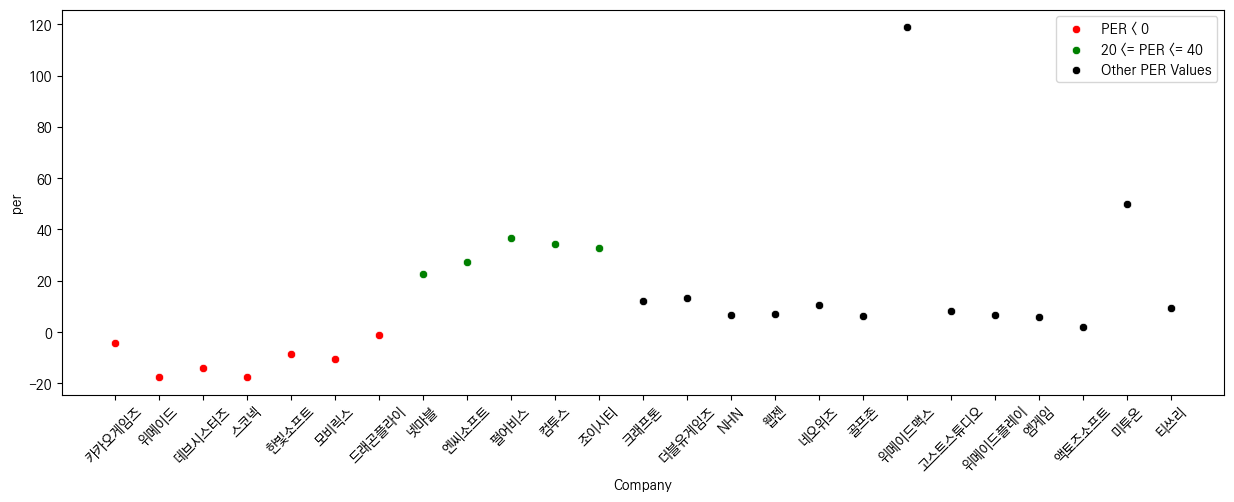

In [70]:
# 산점도 생성
plt.figure(figsize=(15, 5))
plt.xticks(rotation=45)


# plt.xlabel('게임산업을 영위하는 상장기업')
# plt.ylabel('PER 분포')
# plt.title('PER Values for Companies')
# plt.show()

# 음수인 경우 빨간색
sns.scatterplot(data=df_results[df_results['per'] < 0], x=df_results[df_results['per'] < 0].index, y='per', color='red', label='PER < 0')
# 20~40인 경우 초록색
sns.scatterplot(data=df_results[(df_results['per'] >= 20) & (df_results['per'] <= 40)], x=df_results[(df_results['per'] >= 20) & (df_results['per'] <= 40)].index, y='per', color='green', label='20 <= PER <= 40')
# 나머지 값은 기본 색상 (skyblue)
sns.scatterplot(data=df_results[(df_results['per'] >= 0) & ((df_results['per'] < 20) | (df_results['per'] > 40))], x=df_results[(df_results['per'] >= 0) & ((df_results['per'] < 20) | (df_results['per'] > 40))].index, y='per', color='black', label='Other PER Values')

In [ ]:
# 2. 필터링된 'per'열을 이용하여 박스 플롯 생성
plt.figure(figsize=(10, 6))
plt.boxplot(df_results['per'], vert=False, patch_artist=True, boxprops=dict(facecolor="skyblue"))
plt.title('Box Plot of PER Values')
plt.xlabel('PER')
plt.show()

# 업데이트할 기능
- 계산한 수정주가를 df에 새로운 열에 추가하여 PBR, PSR, PER 등 계산하도록 >> 일부 구현
- EV/SALES와 같은 기타 가치배수도 계산하도록